### Background:

AllLife Bank wants to focus on its credit card customer base in the next 
financial year. They have been advised by their marketing research team, that the 
penetration in the market can be improved. Based on this input, the Marketing team 
proposes to run personalised campaigns to target new customers as well as upsell to 
existing customers. Another insight from the market research was that the customers 
perceive the support services of the back poorly. Based on this, the Operations team 
wants to upgrade the service delivery model, to ensure that customers queries are 
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the 
Data Science team for help

### Objective: 

To identify different segments in the existing customer based on their 
spending patterns as well as past interaction with the bank. 


### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?


### Data Description:
-  Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre. 

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Clustering Project- Problem Statement.pdf',
 'Credit Card Customer Data.xlsx',
 'Untitled.ipynb']

In [3]:
df = pd.read_excel("Credit Card Customer Data.xlsx",engine='openpyxl')

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.shape

(660, 7)

In [6]:
data=df.copy()

In [7]:
df.drop('Sl_No',axis=1,inplace=True)

In [8]:
df['Customer Key'].value_counts()

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64

In [9]:
np.where(df['Customer Key']==47437)

(array([  4, 332], dtype=int64),)

In [10]:
df.loc[332]

Customer Key           47437
Avg_Credit_Limit       17000
Total_Credit_Cards         7
Total_visits_bank          3
Total_visits_online        1
Total_calls_made           0
Name: 332, dtype: int64

In [11]:
df.loc[4]

Customer Key            47437
Avg_Credit_Limit       100000
Total_Credit_Cards          6
Total_visits_bank           0
Total_visits_online        12
Total_calls_made            3
Name: 4, dtype: int64

- 5 customer key values are repeating . But all other values are different. So let's retain that rows
- As customer key does not add any info, I am dropping that ID

In [12]:
df.drop(['Customer Key'], axis=1, inplace =True)

In [13]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


- All are integer values that are suitable for clustering techniques
- There is no null values

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


- Outliers in the data should be less
- Need to normalize the data as the values are in different range

In [16]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

print('Lower Bound for NON Outliers')
print(lower)
print()
print('Upper Bound for NON Outliers')
print(upper)

Lower Bound for NON Outliers
Avg_Credit_Limit      -47000.0
Total_Credit_Cards        -1.5
Total_visits_bank         -3.5
Total_visits_online       -3.5
Total_calls_made          -5.0
dtype: float64

Upper Bound for NON Outliers
Avg_Credit_Limit       105000.0
Total_Credit_Cards         10.5
Total_visits_bank           8.5
Total_visits_online         8.5
Total_calls_made           11.0
dtype: float64


In [17]:
((df < lower) | (df > upper)).sum()/len(df)*100       #Calculating the percentage of outliers in the data.

Avg_Credit_Limit       5.909091
Total_Credit_Cards     0.000000
Total_visits_bank      0.000000
Total_visits_online    5.606061
Total_calls_made       0.000000
dtype: float64

- Avg_Credit_limit and Total_visits_Online has few outliers

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


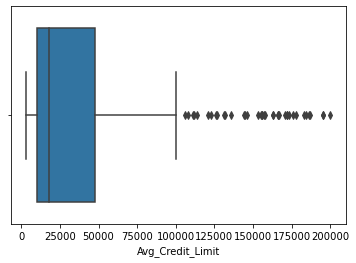

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


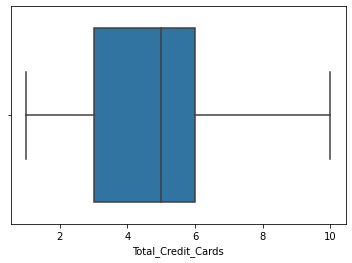

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


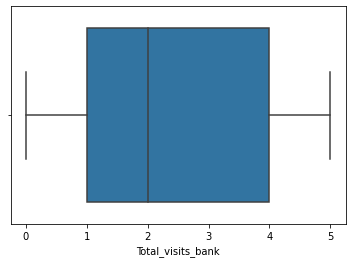

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


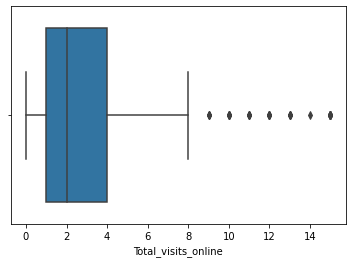

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


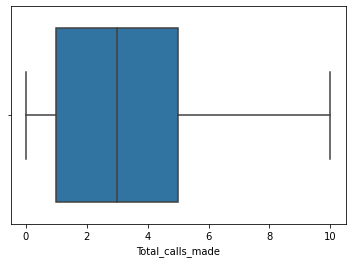

In [18]:
for column in df.select_dtypes(include='number'):
    sns.boxplot(df[column])
    plt.show()

- Avg_Credit_limit and Total_visits_Online has few outliers as discussed before. 
- Currently, I am just keeping those outliers without handling it

In [19]:
##Scale the data
from scipy.stats import zscore
df=df.apply(zscore)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,8.612639e-17,1.000758,-0.839808,-0.653623,-0.440840,0.357097,4.399975
Total_Credit_Cards,660.0,4.306320e-17,1.000758,-1.710864,-0.787585,0.135694,0.597334,2.443892
Total_visits_bank,660.0,-4.306320e-17,1.000758,-1.473731,-0.860451,-0.247170,0.979390,1.592670
Total_visits_online,660.0,7.536059e-17,1.000758,-0.888380,-0.547490,-0.206600,0.475180,4.224968
Total_calls_made,660.0,-8.612639e-17,1.000758,-1.251537,-0.902271,-0.203739,0.494794,2.241125


In [21]:
def plot_univariate(dataframe):
    num_var=dataframe.select_dtypes(include='number')
    for column in num_var.columns:
        plt.figure(figsize=(20,5))
        sns.distplot(dataframe[column])
        plt.show()

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


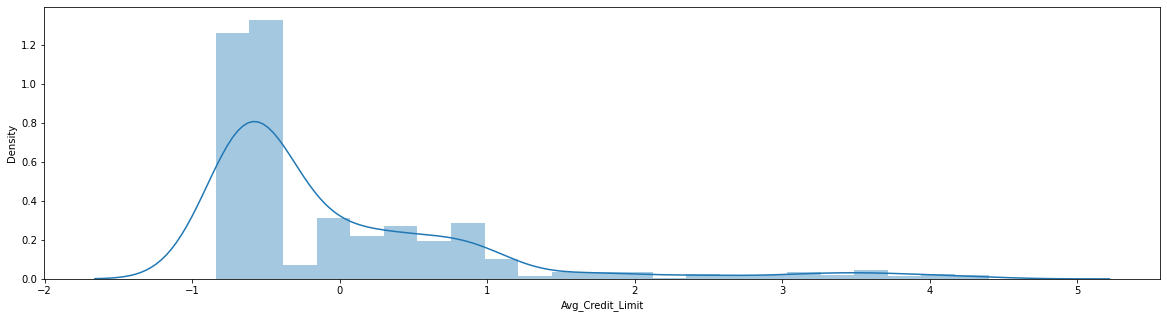

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


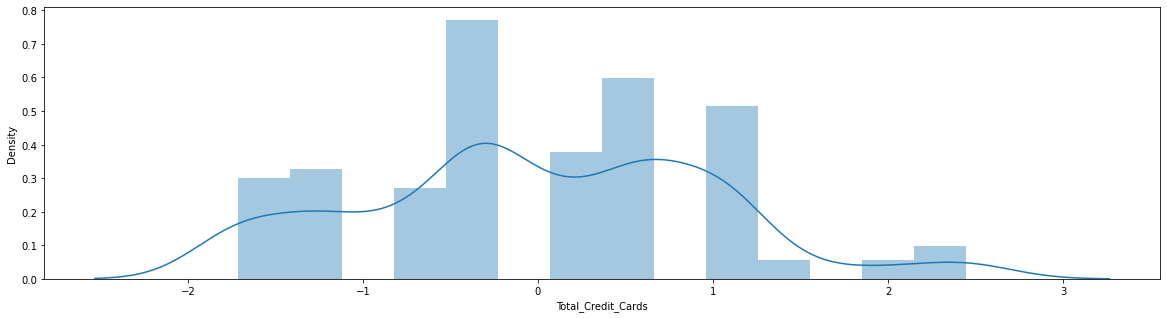

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


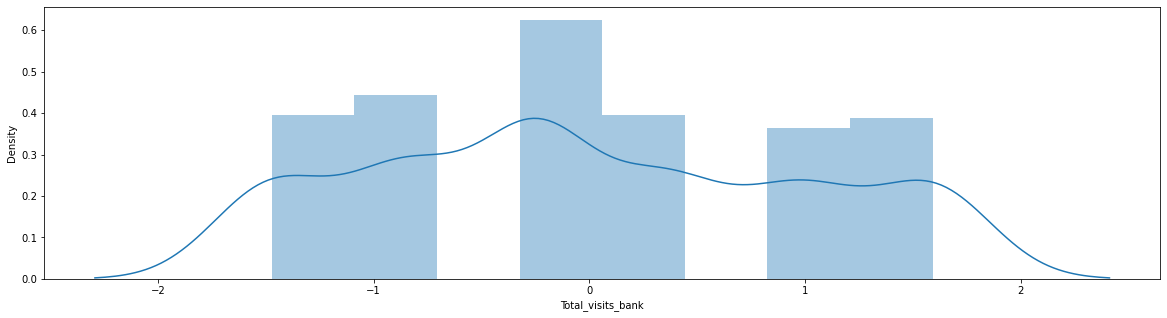

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


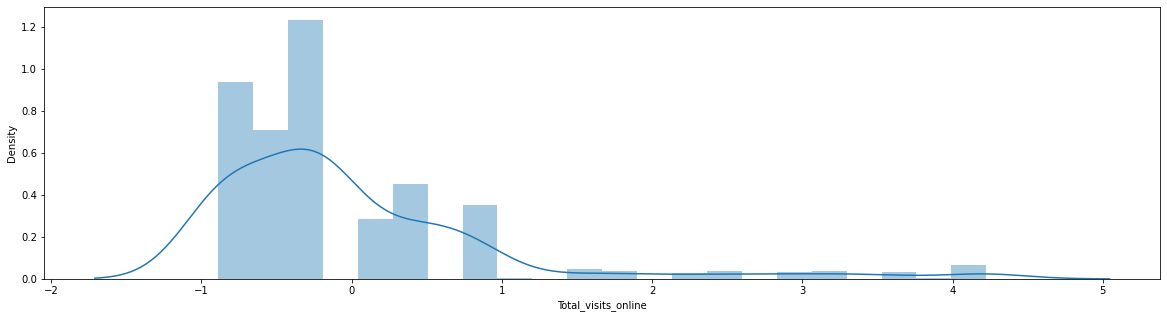

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


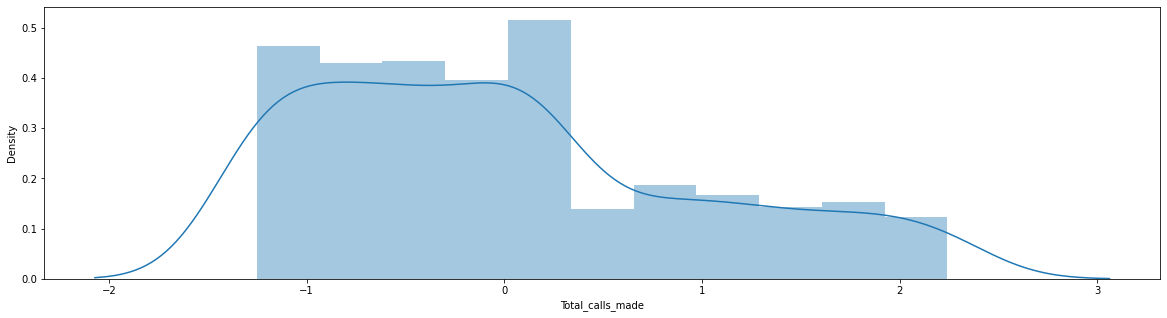

In [22]:
plot_univariate(df)

- Avg_Credit_Limit: it has 2 peak and outliers can be considered as another peak
- Total_Credit_Cards: 4 guassisns; but density of forth gaussian is very less
- Total_visits_bank: mixture of 3 guassians
- Total_visits_online: mixture of 3 guassians and outliers can be considered as another peak
- Total_calls_made- mixture of 2 gaussians

- Therefore we can assume that, minimum 3-4 clusters will be present in the data

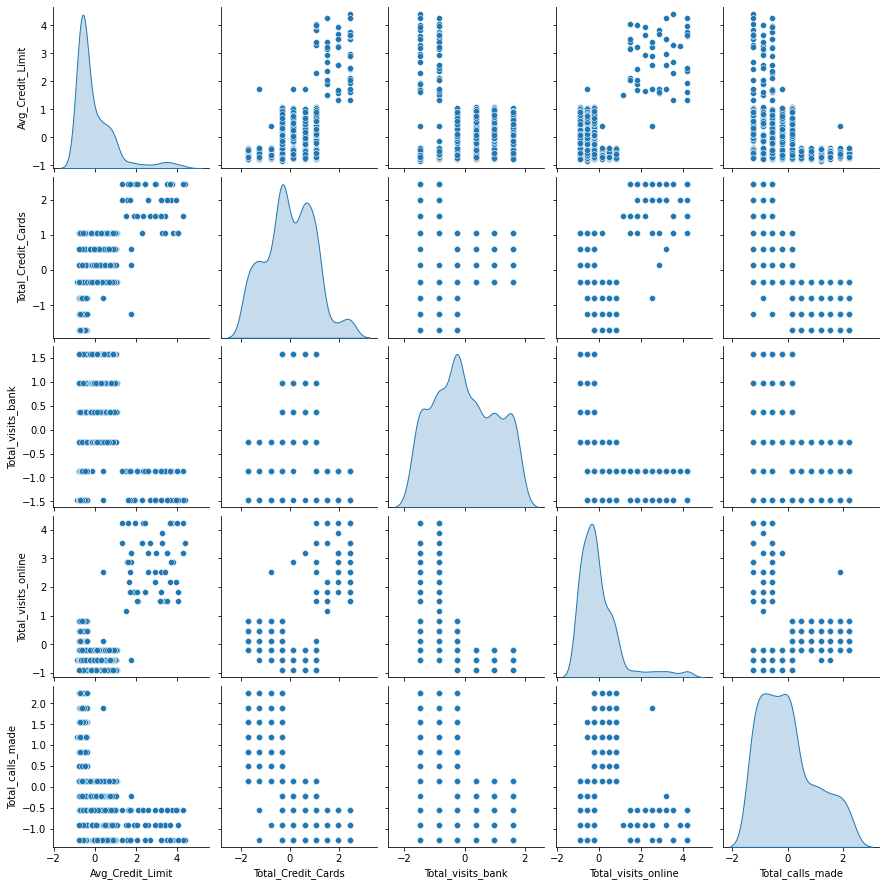

In [24]:
sns.pairplot(df, diag_kind='kde') 

- 2 clusters can be obseved in Total credit cards versus other variables
- Total visits online versus Avg_Credit_Limit and Total credits versus Avg_Credit_Limit have 2 clusters each.
- we can observe 2 clusters in most of the multivariate plots 

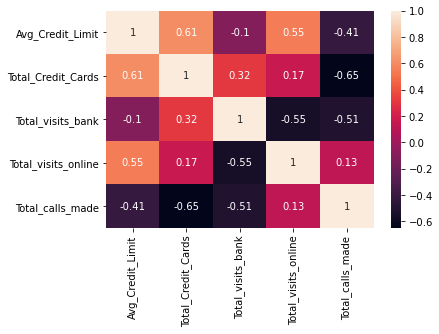

In [25]:
sns.heatmap(df.corr(),annot=True)

- Total_credit_cards and total calls made have a negative correlation
- Total visits bank and total call made have a -ve correlation
- Total credit cards aAvg_credit limit has a +ve correlation
- Total credit cards Total visits online has has a +ve correlation

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

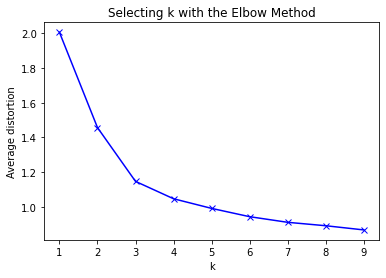

In [26]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    prediction=model.predict(df)
    meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

- By using elbow method, we can select k=3
- We can also check with k ranges from 3 to 7 as distortion is decreasing

In [27]:
# checking clusters with silhouette score
import sklearn
cluster_num=range(2,8)
for k in cluster_num :
    model=KMeans(n_clusters=k)
    model.fit(df)
    print(k,sklearn.metrics.silhouette_score(df, model.labels_),np.unique(model.labels_, return_counts=True))

2 0.41842496663215445 (array([0, 1]), array([224, 436], dtype=int64))
3 0.5157182558881063 (array([0, 1, 2]), array([ 50, 386, 224], dtype=int64))
4 0.3556670619372605 (array([0, 1, 2, 3]), array([221, 190, 199,  50], dtype=int64))
5 0.27239829454176767 (array([0, 1, 2, 3, 4]), array([196, 117,  50, 107, 190], dtype=int64))
6 0.25545029453623114 (array([0, 1, 2, 3, 4, 5]), array([109, 123, 171,  50, 101, 106], dtype=int64))
7 0.24805763002952325 (array([0, 1, 2, 3, 4, 5, 6]), array([110, 113,  50, 102,  94, 111,  80], dtype=int64))


- Silhouette score enhances our conclusion of k=3. Silhouette score is reducing for k >3 and for k=2
- For k=3, Even though number of samples in a cluster =50, we can observe same number of cluster point with k>3

In [28]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [29]:
kmeans.fit(df)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [30]:
centroids = kmeans.cluster_centers_ # cluster centers

In [31]:
print(centroids)

[[-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]
 [ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]]


In [32]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [33]:
df_labelled_kmeans=df.join(df_labels)

In [34]:
df_labelled_kmeans

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [35]:
df_labelled_kmeans['labels'].value_counts()

1    386
0    224
2     50
Name: labels, dtype: int64

- cluster 1 has 386 values
- cluster 0 has 224 values
- and cluster 2 has 50 values

In [36]:
#df_labelled_kmeans.drop(['Sl_No','Customer Key'],axis=1,inplace=True)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray fr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226BF05DF28>,
      dtype=object)

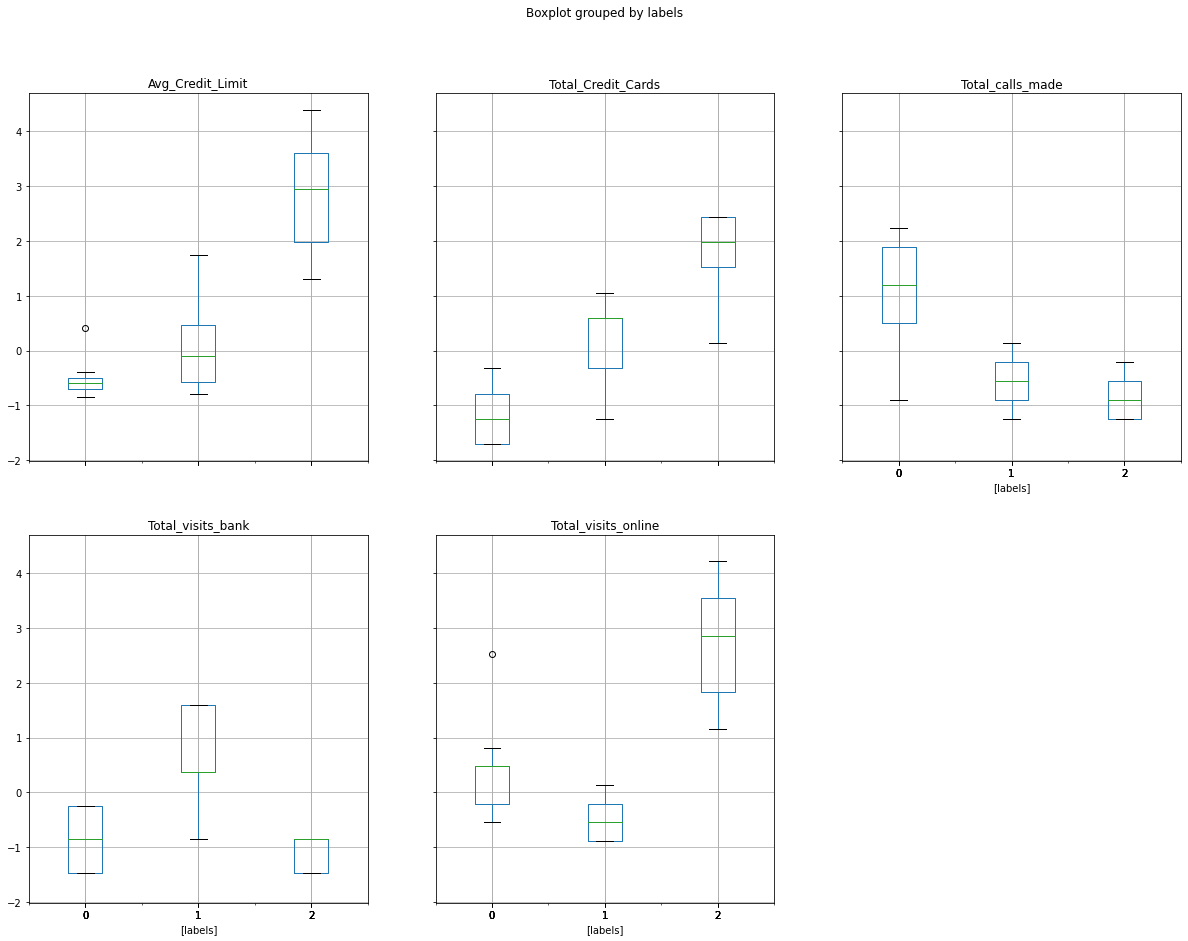

In [37]:
df_labelled_kmeans.boxplot(by = 'labels',  layout=(2,3), figsize=(20, 15))

- The cluster(third) with more number of credit cards made less calls and less bank visits. whereas they have more online visits
- Total calls made by group zero is very high. But they have less credit card limits and less creditt cards. One reason could be the issues raised by the customer through call are not resolved properly
- Group 1 has more bank visits. They visit online less. Their avg credit limit and credit card number are between thos of group 0 and group 1

In [38]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

complete 0.8599730607972423


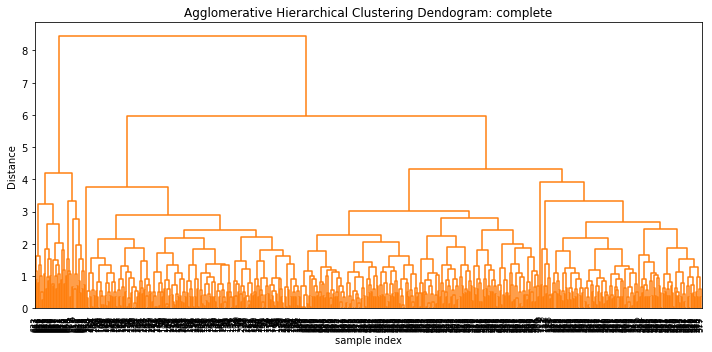

average 0.8977080867389372


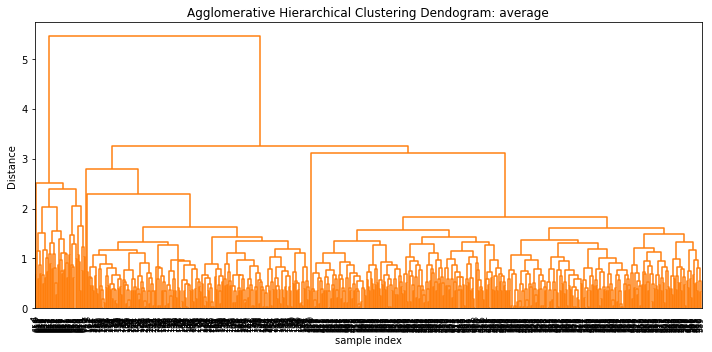

centroid 0.8939385846326323


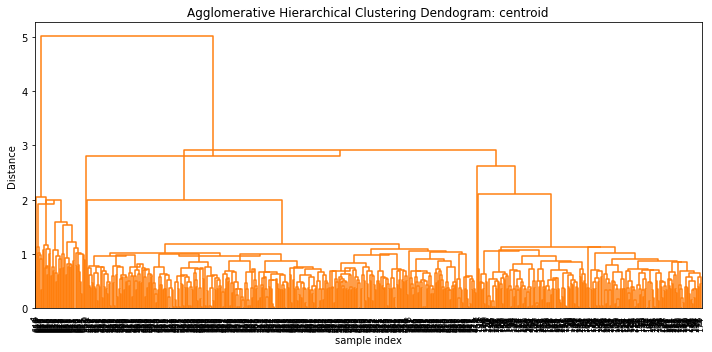

single 0.7391220243806552


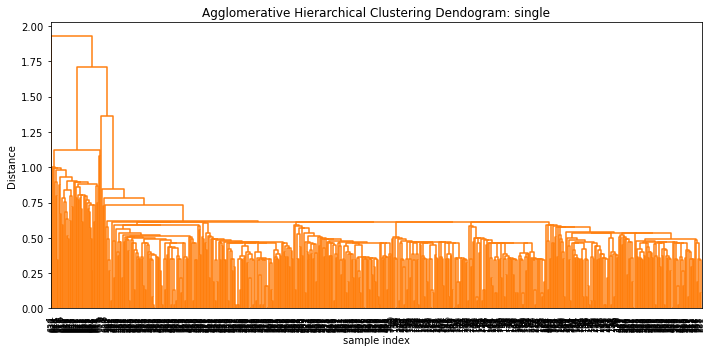

weighted 0.8861746814895477


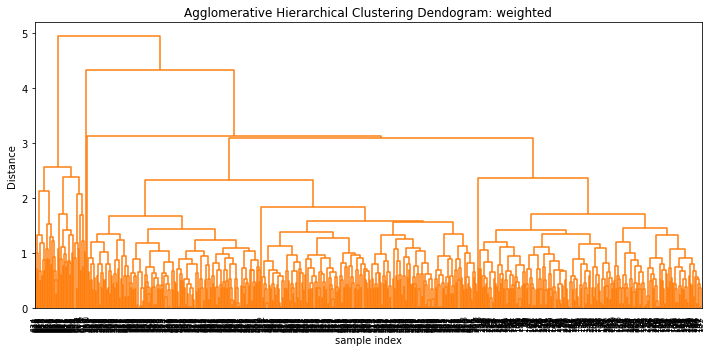

ward 0.7415156284827493


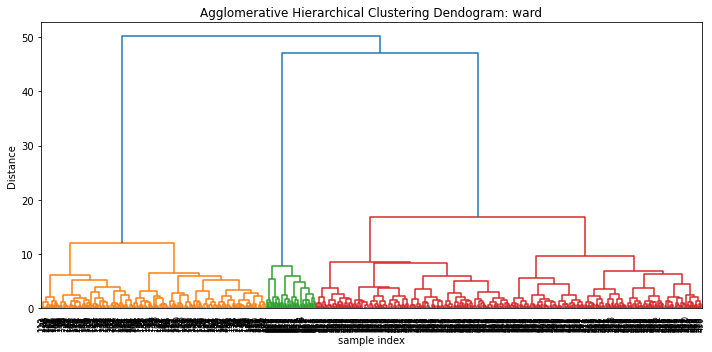

In [57]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

for i in ['complete','average','centroid','single','weighted','ward']:
    Z = linkage(df, metric='euclidean', method=i)
    c, coph_dists = cophenet(Z , pdist(df))

    print(i,c)
    plt.figure(figsize=(10, 5))
    plt.title('Agglomerative Hierarchical Clustering Dendogram: %s'%i)
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
    plt.tight_layout()
    plt.show()

- Dendrogram generated by the linkage weighted and centroid are very similiar
- Dendrogram generated by the linkage average and  are very similiar
- Dendrogram generated by the linkage ward and single are differnt from others
- Among ['complete','average','centroid','single','weighted','ward] distances on dendrogram, cophent index is best for 'averge'
- Cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram closer it is to 1, the better is the clustering

In [40]:
#average

Z = linkage(df, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df))

c

0.8977080867389372

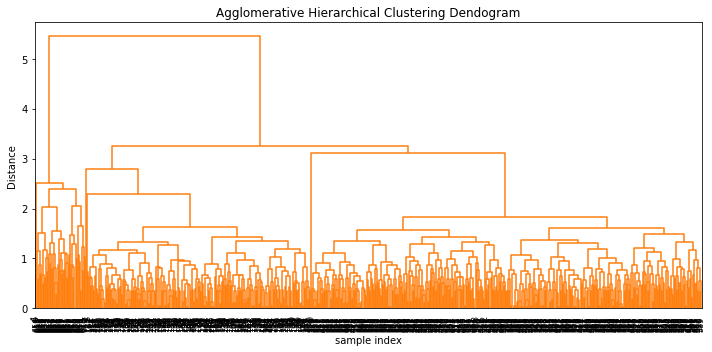

In [41]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

- Let's try with 3, 4 and 5 clusters

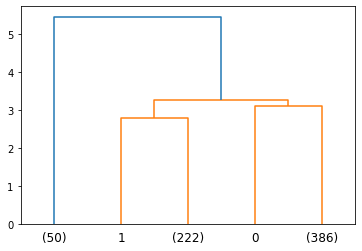

In [42]:
### From the truncated dendrogram, find out the optimal distance between clusters which u want to use
### an input for clustering data
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

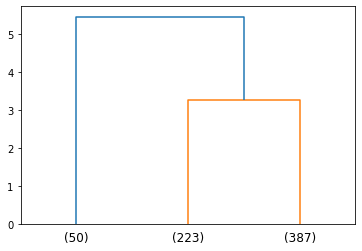

In [43]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [44]:
max_d=3 #o get 4 clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
np.unique(clusters,return_counts=True)

(array([1, 2, 3, 4], dtype=int32), array([ 50, 223, 386,   1], dtype=int64))

In [45]:
max_d=2.7#o get 5 clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
np.unique(clusters,return_counts=True)

(array([1, 2, 3, 4, 5], dtype=int32),
 array([ 50, 222,   1, 386,   1], dtype=int64))

In [46]:
max_d=3.2 #to get 3 clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
print(clusters)
print(np.unique(clusters,return_counts=True))

[3 2 3 3 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

- if number of clusters= 4 or5 , ther are clusters with only one data point
- whereas for k=3, there is descent number of data points in each cluster

In [47]:
df_hier=df.copy()

In [48]:
df_hier['h_cluster_centers']=clusters

In [49]:
df_hier.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,h_cluster_centers
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,3
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,3
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,3
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray fr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226C52899E8>,
      dtype=object)

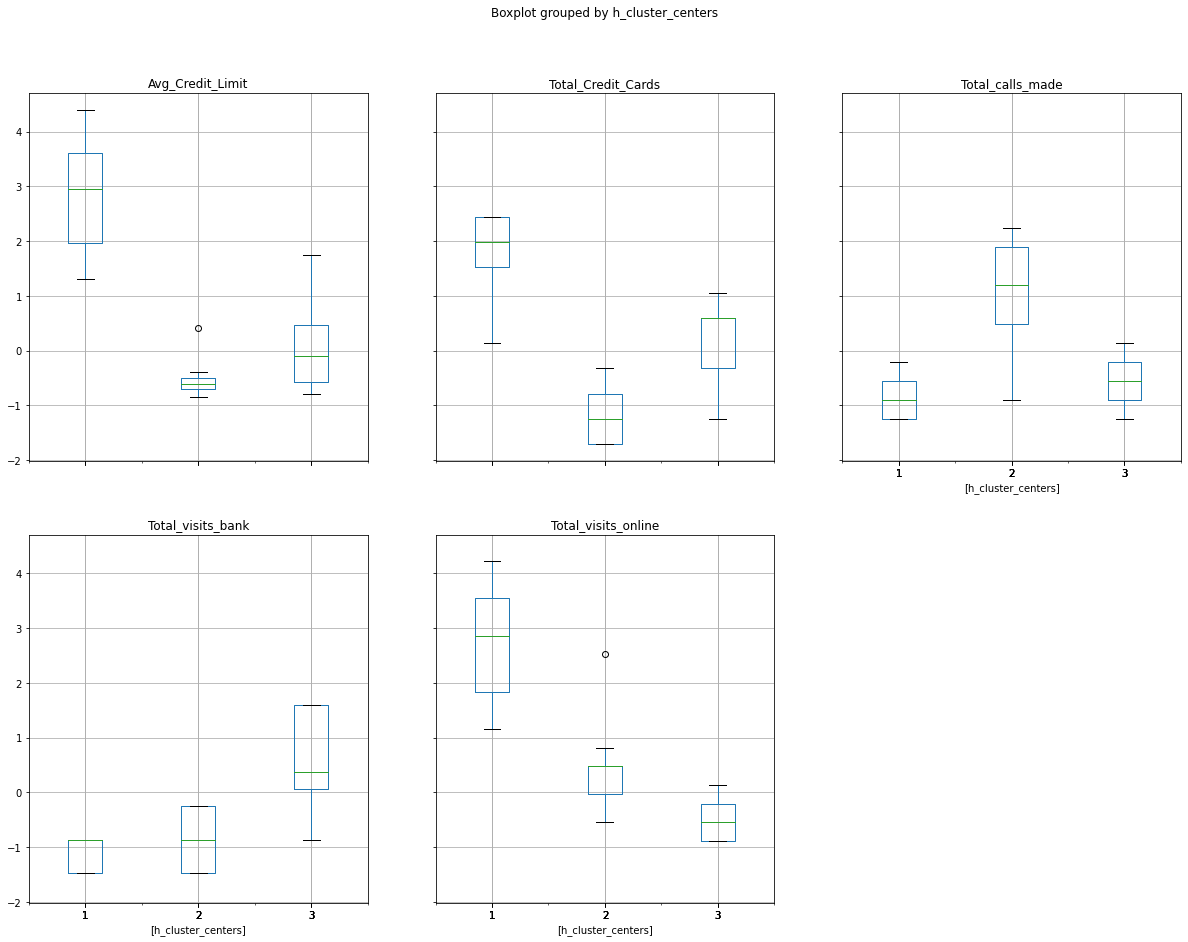

In [50]:
df_hier.boxplot(by='h_cluster_centers',layout=(2,3), figsize=(20,15))
#(by = 'labels',  layout=(2,3), figsize=(20, 15))

- The cluster(first) with more number of credit cards made less calls and less bank visits. whereas they have more online visits. Their average credit limit and bank visits are high
- Total calls made by group 2 is very high. But they have less credit  limits and less credit cards. One reason could be the issues raised by the customer through call are not resolved properly. Their total visits to bank and Total visits online are comparitively low
- Group 3 has more bank visits. They visit online less. Their avg credit limit and total credit cards are low while comparing with group 1
- From the box plots obtained from k-means and hierarchical clustering, it is observed that charcteristics of clusters formed by both methods are very similiar

In [59]:
#Silhouette score for k-means and hierarchical clustering
import sklearn
print(' Silhouette score of kmeans clustering',sklearn.metrics.silhouette_score(df,df_labels['labels']))
print(' Silhouette score of Hierarchical clustering',sklearn.metrics.silhouette_score(df, clusters))


 Silhouette score of kmeans clustering 0.5157182558881063
 Silhouette score of Hierarchical clustering 0.515922432650965


- Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

- Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

- Here silhouette score of kmeans clustering and Hierarchical clustering are around 0.515. This implies both clustering are simliliar

In [60]:
print(df_labels['labels'].value_counts())
print(df_hier['h_cluster_centers'].value_counts())

1    386
0    224
2     50
Name: labels, dtype: int64
3    387
2    223
1     50
Name: h_cluster_centers, dtype: int64


- only one value has different clustering. We can verify this using visualization of data

### Visualize the results on PCA-reduced data

In [52]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=5)
pca3.fit(df)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
dfpca3 = pca3.transform(df)

[[ 0.48885901  0.59767943  0.28049227  0.11178284 -0.55912866]
 [ 0.40323959  0.03017103 -0.58658661  0.66516108  0.22352726]
 [ 0.00346147 -0.28498293 -0.6135219  -0.3049481  -0.67035086]
 [ 0.30861651 -0.74135216  0.44527763  0.31838769 -0.23560546]
 [-0.70933671  0.10512237  0.05058609  0.59220036 -0.36404738]]
[0.45736578 0.37426483 0.06401348 0.0555688  0.04878711]


- When we perform PCA on our data, we can observe that information in last 3 dimensions are very less
- So for visualizing the cluster I am converting our data to 2 dimension.


In [53]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
pca3.fit(df)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
reduced_data = pca3.transform(df)

[[ 0.48885901  0.59767943  0.28049227  0.11178284 -0.55912866]
 [ 0.40323959  0.03017103 -0.58658661  0.66516108  0.22352726]]
[0.45736578 0.37426483]


In [54]:
reduced_data[:,1].shape

(660,)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


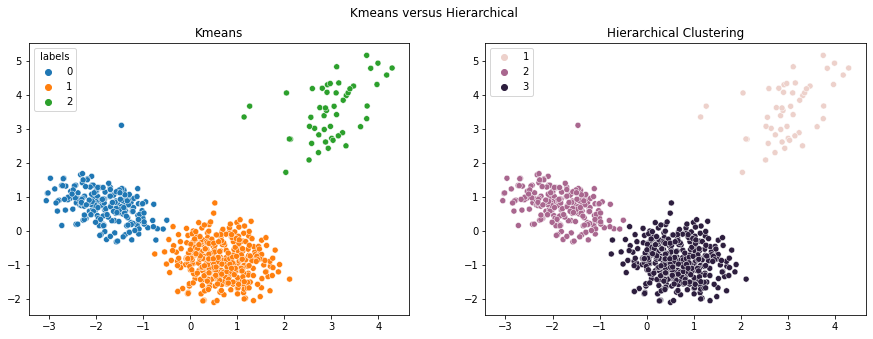

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
fig.suptitle('Kmeans versus Hierarchical')
ax1.set_title('Kmeans')
sns.scatterplot(reduced_data[:,0],reduced_data[:,1],hue=df_labels['labels'],ax=ax1)
ax2.set_title('Hierarchical Clustering')
sns.scatterplot(reduced_data[:,0],reduced_data[:,1],hue=clusters,ax=ax2)

- Clusters formed by kmeans and hierarchical clustering are very similiar
- Very few datapoints(one point near decision boundary) are clustered in different clusters for both methods
- As discussed before, clusters formed by hierarchical clustering and kmeans are very similiar
- Cluster 0 in kmeans is same as Cluster 2 in hierarchical clustering
- Cluster 1 in kmeans is same as Cluster 3 in hierarchical clustering
- Cluster 2 in kmeans is same as Cluster 1 in hierarchical clustering

### Key Insights
- We had Data of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre. 
- When we clustered with kmeans and hierarchical clustering, we got similiar clusters
- We have observed 3 clusters of customers. Cluster formd by the customers who have online visits(high credit card numbe) is very much differntiated from other 2 clusters
- The cluster(first) with more number of credit cards made less calls and less bank visits. whereas they have more online visits. Their average credit limit and bank visits are high
- Total calls made by another cluster is very high. But they have less credit  limits and less credit cards. One reason could be the issues raised by the customer through call are not resolved properly. Their total visits to bank and Total visits online are comparitively low
- Another customer has more bank visits. They visit online less. Their avg credit limit and total credit cards are low while comparing with customers who make online visits but greater while comparing with customers who make more phone calls
- We should educate about the online servicees of bank to customers(especially who use phone call and online services), so that their issues will be resolved quickly and they get served quickly. that gives more customer satisfaction and encourages customers for taking more credit cards and to use credit card effectively
- We should attend the customers who use phone calls to approach bank for queries in a better manner. Because they are the customers with less credit cards and credit card limit. We should improvise this cluster. Their problems may not be resolved in phone calls. Maybe because of that their credit card usage is less. Therefore we should improve the service at phone calls. Also we should help them to use online services.
- Even though the customers whop vist bak online has better credit card usage than customers use phone calls; their credit card usage is less compared to online users. Therfore it will be really great, if we can educate them whiele they visit bank. They may not how to use internet. If we give them a demo/leaflet for helping them to use online services, that will encourage customes
